## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
# YOUR CODE HERE
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
sns.set()

telco = pd.read_csv("../data/Telecom-Churn.csv")
telco.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
telco.drop(columns=["Unnamed: 0", "CustomerID"], inplace=True)
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [3]:
# Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.

telco.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7017.000000,7032.000000
mean,0.162147,32.371149,64.707482,2283.300441
std,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,401.450000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


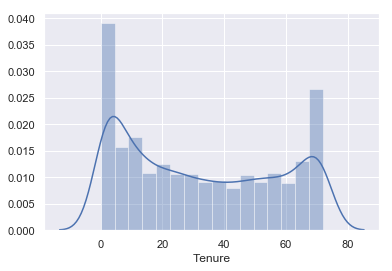

In [4]:
g1 = sns.distplot(telco['Tenure'])

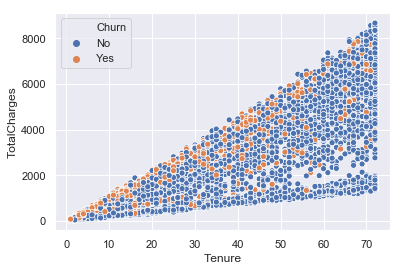

In [5]:
g2 = sns.scatterplot(x='Tenure', y='TotalCharges',hue='Churn', data=telco)

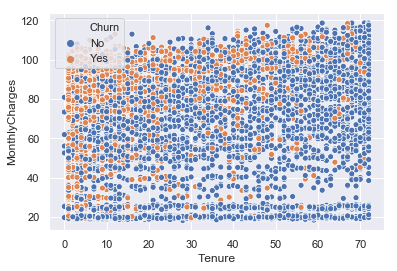

In [6]:
g3 = sns.scatterplot(x='Tenure', y='MonthlyCharges',hue='Churn', data=telco)

In [7]:
# Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.

telco['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

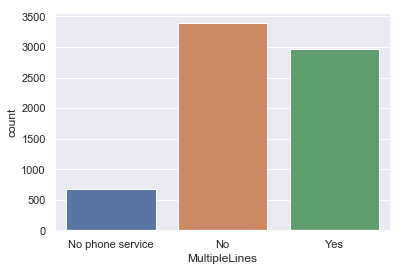

In [8]:
g2 = sns.countplot(x='MultipleLines', data=telco)

In [9]:
telco['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

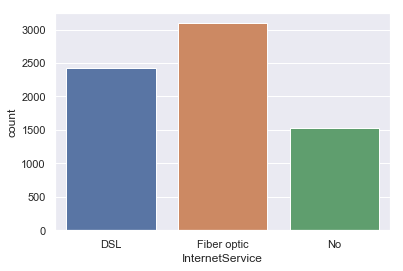

In [10]:
g3 = sns.countplot(x='InternetService', data=telco)

In [11]:
telco['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

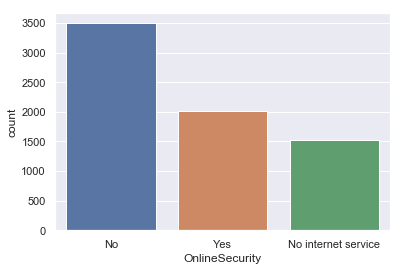

In [12]:
g4 = sns.countplot(x='OnlineSecurity', data=telco)

In [13]:
telco['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

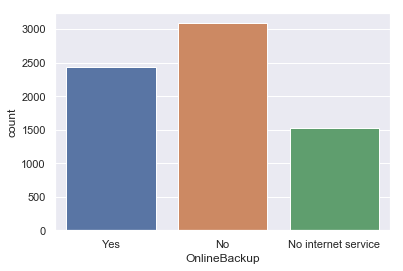

In [14]:
g5 = sns.countplot(x='OnlineBackup', data=telco)

In [15]:
telco['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

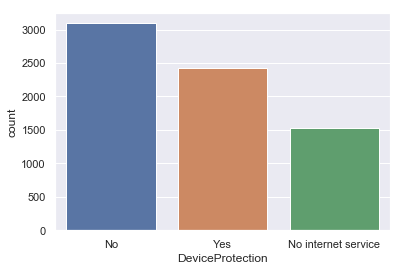

In [16]:
g6 = sns.countplot(x='DeviceProtection', data=telco)

In [17]:
telco['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

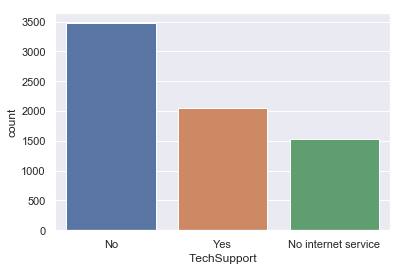

In [18]:
g7 = sns.countplot(x='TechSupport', data=telco)

In [19]:
telco['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

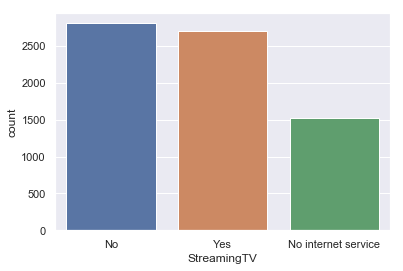

In [20]:
g8 = sns.countplot(x='StreamingTV', data=telco)

In [21]:
telco['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

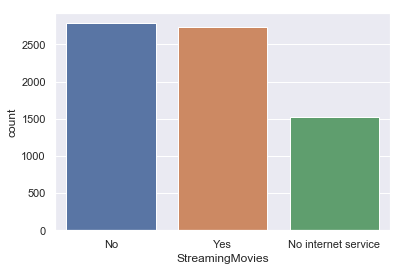

In [22]:
g9 = sns.countplot(x='StreamingMovies', data=telco)

In [23]:
telco['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

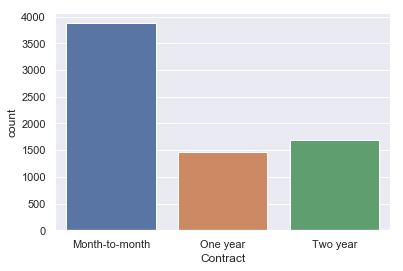

In [24]:
g10 = sns.countplot(x='Contract', data=telco)

In [25]:
telco['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

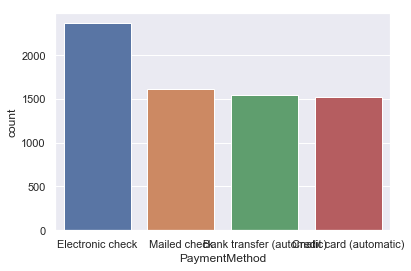

In [26]:
g11 = sns.countplot(x='PaymentMethod', data=telco)

In [27]:
# Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

telco.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [28]:
cisatri = telco[["Tenure", "MonthlyCharges", "TotalCharges"]]
corr_table = cisatri.corr()
corr_table

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


In [ ]:
# Najväčšia závislosť je medzi atribútmi `Tenure` a `TotalCharges`.

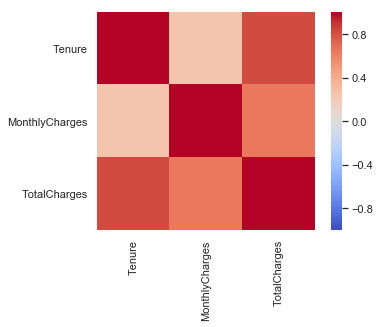

In [29]:
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1, vmax=1,
                cmap='coolwarm',
                square=True)    

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [30]:
# Diskretizujte číselné atribúty MonthlyCharges a TotalCharges do 5 rovnako veľkých intervalov.

#telco["MonthlyCharges_ordinal"] = pd.cut(telco["MonthlyCharges"], 5)
telco["MonthlyCharges_ordinal"] = pd.cut(telco["MonthlyCharges"], bins=[0, 39, 59, 79, 99, 120], labels=["low", "normal", "high", "very high", "extra high"])
telco["MonthlyCharges_ordinal"].value_counts()

low           1808
very high     1802
high          1386
normal        1014
extra high    1007
Name: MonthlyCharges_ordinal, dtype: int64

In [31]:
#telco["TotalCharges_ordinal"] = pd.cut(telco["TotalCharges"], 5)
telco["TotalCharges_ordinal"] = pd.cut(telco["TotalCharges"], bins=[0, 1760, 3500, 5250, 7000, 9000], labels=["low", "normal", "high", "very high", "extra high"])
telco["TotalCharges_ordinal"].value_counts()

low           3948
normal        1174
high           878
very high      705
extra high     327
Name: TotalCharges_ordinal, dtype: int64

In [32]:
# Diskretizujte číselný atribút Tenure na 5 intervalov s rovnakou početnosťou príkladov.

telco["Tenure_ordinal"] = pd.qcut(telco["Tenure"], 5)
telco["Tenure_ordinal"].value_counts()

(-0.001, 6.0]    1481
(20.0, 40.0]     1408
(60.0, 72.0]     1407
(6.0, 20.0]      1397
(40.0, 60.0]     1350
Name: Tenure_ordinal, dtype: int64

In [33]:
telco["Tenure_ordinal"] = pd.cut(telco["Tenure"], bins=[0, 6, 20, 40, 60, 100], labels=["very short", "short", "normal", "long", "very long"])
telco["Tenure_ordinal"].value_counts()
# pre pd.qcut sa mi nepodarilo pomenovat labels

very short    1470
normal        1408
very long     1407
short         1397
long          1350
Name: Tenure_ordinal, dtype: int64

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [34]:
# Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi Tenure, MonthlyCharges, TotalCharges a atribútom Churn (využite diskretizovanie hodnôt z úlohy 4).
# Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
# popisat jednotlive triedy, jedntlive zavislosti po atributoch k cielovemu atributu

pd.pivot_table(telco, index=["Tenure_ordinal", "MonthlyCharges_ordinal", "TotalCharges_ordinal"], values="Churn", aggfunc="count")

Churn
Tenure_ordinal MonthlyCharges_ordinal TotalCharges_ordinal       
very short     low                    low                   453.0
               normal                 low                   332.0
               high                   low                   354.0
               very high              low                   299.0
               extra high             low                    28.0
short          low                    low                   405.0
               normal                 low                   222.0
               high                   low                   318.0
               very high              low                   343.0
                                      normal                 22.0
               extra high             low                    66.0
                                      normal                 14.0
normal         low                    low                   351.0
               normal                 low                   166.0
                                      normal                 44.0
               high                   low                    69.0
                                      normal                198.0
               very high              low                     8.0
                                      normal                381.0
                                      high                   20.0
               extra high             normal                101.0
                                      high                   68.0
long           low                    low                   299.0
                                      normal                  7.0
               normal                 low                     2.0
                                      normal                155.0
               high                   normal                124.0
                                      high                  120.0
               very high              normal                 11.0
                                      high                  293.0
                                      very high              50.0
               extra high             high                  122.0
                                      very high             160.0
                                      extra high              1.0
very long      low                    low                   222.0
                                      normal                 65.0
               normal                 normal                 46.0
                                      high                   45.0
               high                   high                  172.0
                                      very high              29.0
               very high              high                   35.0
                                      very high             333.0
                                      extra high              6.0
               extra high             very high             129.0
                                      extra high            318.0

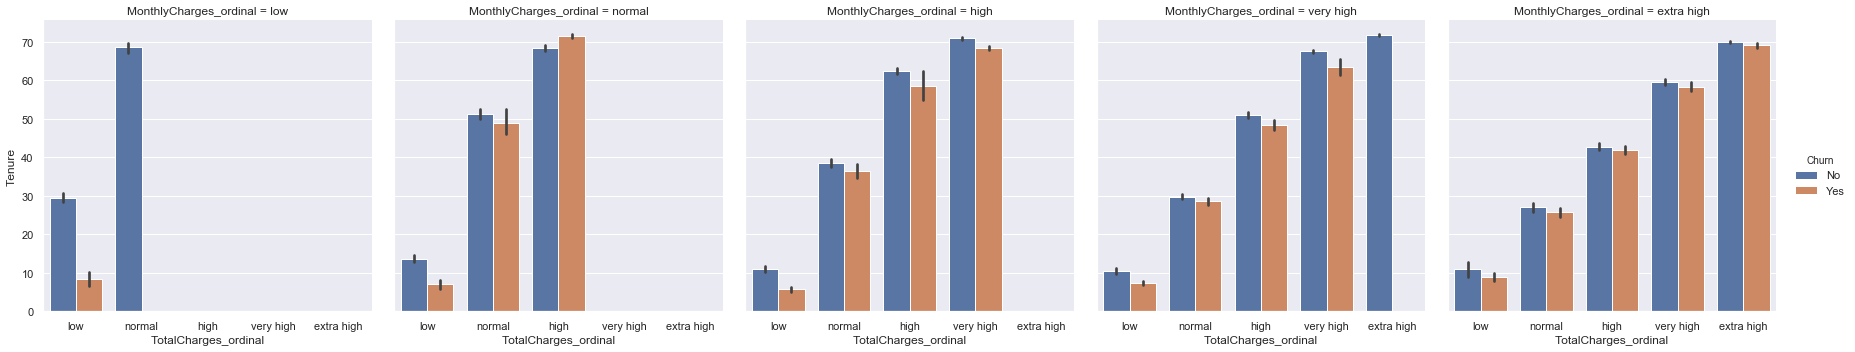

In [35]:
sns.catplot(x="TotalCharges_ordinal", y="Tenure", hue="Churn", col="MonthlyCharges_ordinal", data=telco, kind="bar")

In [36]:
pd.pivot_table(telco, index=['TotalCharges_ordinal'], values='Churn', aggfunc='count')

,Churn
TotalCharges_ordinal,
low,3948
normal,1174
high,878
very high,705
extra high,327


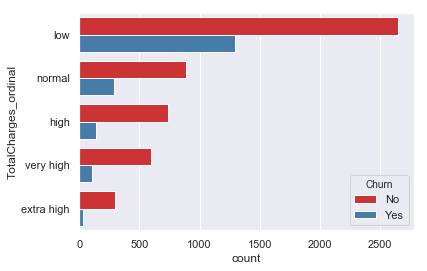

In [37]:
ch1 = sns.countplot(y='TotalCharges_ordinal', data=telco, hue='Churn', palette='Set1')

In [38]:
pd.pivot_table(telco, index=['MonthlyCharges_ordinal'], values='Churn', aggfunc='count')

,Churn
MonthlyCharges_ordinal,
low,1808
normal,1014
high,1386
very high,1802
extra high,1007


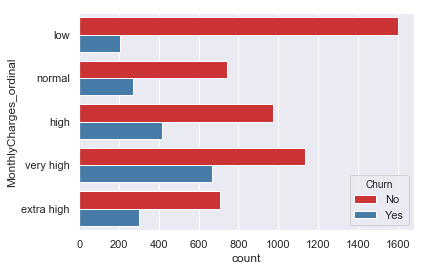

In [39]:
ch2 = sns.countplot(y='MonthlyCharges_ordinal', data=telco, hue='Churn', palette='Set1')

In [40]:
pd.pivot_table(telco, index=['Tenure_ordinal'], values='Churn', aggfunc='count')

,Churn
Tenure_ordinal,
very short,1470
short,1397
normal,1408
long,1350
very long,1407


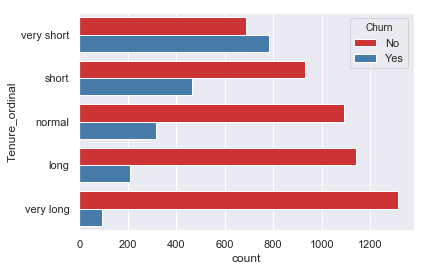

In [41]:
ch3 = sns.countplot(y='Tenure_ordinal', data=telco, hue='Churn', palette='Set1')

In [42]:
# Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi Gender, SeniorCitizen a atribútom Churn.

pd.pivot_table(telco, index="SeniorCitizen", columns="Gender", values="Churn", aggfunc="count")

Gender,Female,Male
SeniorCitizen,,
0,2920,2981
1,568,574


In [43]:
# Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty PhoneService, InternetService, StreamingTV, StreamingMovies. 
# Početnosti vizualizujte aj pomocou Seaborn knižnice.

pd.crosstab(index=telco["StreamingTV"], columns=telco["InternetService"])

InternetService,DSL,Fiber optic,No
StreamingTV,,,
No,1464,1346,0
No internet service,0,0,1526
Yes,957,1750,0


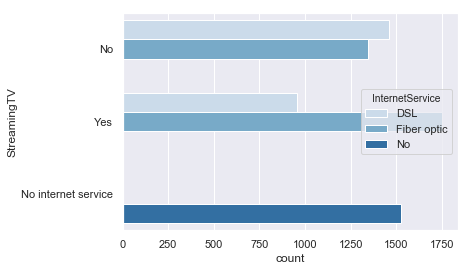

In [44]:
b1 = sns.countplot(y='StreamingTV', data=telco, hue='InternetService', palette='Blues')

In [45]:
pd.crosstab(index=telco["StreamingMovies"], columns=telco["InternetService"])

InternetService,DSL,Fiber optic,No
StreamingMovies,,,
No,1440,1345,0
No internet service,0,0,1526
Yes,981,1751,0


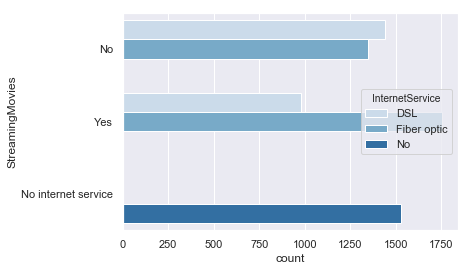

In [46]:
b2 = sns.countplot(y='StreamingMovies', data=telco, hue='InternetService', palette='Blues')

In [47]:
pd.crosstab(index=telco["PhoneService"], columns=telco["InternetService"])

InternetService,DSL,Fiber optic,No
PhoneService,,,
No,682,0,0
Yes,1739,3096,1526


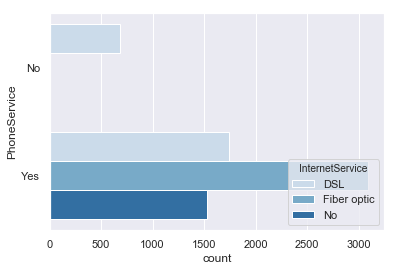

In [48]:
b3 = sns.countplot(y='PhoneService', data=telco, hue='InternetService', palette='Blues')

In [49]:
pd.crosstab(index=telco["StreamingTV"], columns=telco["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


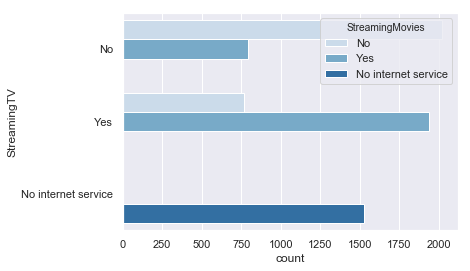

In [50]:
b4 = sns.countplot(y='StreamingTV', data=telco, hue='StreamingMovies', palette='Blues')

In [51]:
pd.crosstab(index=telco["PhoneService"], columns=telco["StreamingTV"])

StreamingTV,No,No internet service,Yes
PhoneService,,,
No,397,0,285
Yes,2413,1526,2422


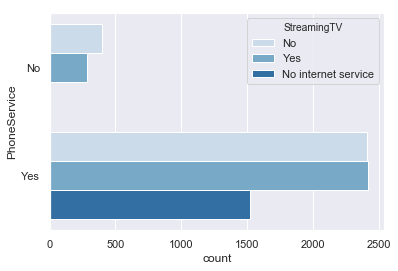

In [52]:
b5 = sns.countplot(y='PhoneService', data=telco, hue='StreamingTV', palette='Blues')

In [53]:
pd.crosstab(index=telco["PhoneService"], columns=telco["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
PhoneService,,,
No,384,0,298
Yes,2401,1526,2434


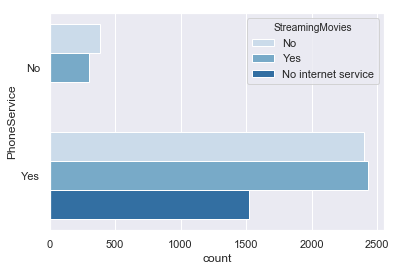

In [54]:
b6 = sns.countplot(y='PhoneService', data=telco, hue='StreamingMovies', palette='Blues')

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [55]:
# Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte MonthlyCharges v závislosti od atribútu TotalCharges a Tenure.
# total charge deleno tenure

def replace_MonthlyCharges(row):
    MonthlyCharges = row["MonthlyCharges"]
    Tenure = row["Tenure"]
    TotalCharges = row["TotalCharges"]
    if pd.isna(MonthlyCharges):
        return (TotalCharges / Tenure)
    else:
        return MonthlyCharges;
    
telco["MonthlyCharges"] = telco.apply(replace_MonthlyCharges, axis=1)
telco["MonthlyCharges"].isna().sum()

0

In [56]:
# Pre hodnoty TotalCharges porozmýšľajte nad odvodením chýbajúcich hodnôt na základe Tenure.

def replace_TotalCharges(row):
    MonthlyCharges = row["MonthlyCharges"]
    Tenure = row["Tenure"]
    TotalCharges = row["TotalCharges"]
    if pd.isna(TotalCharges):
        return (MonthlyCharges * Tenure)
    else:
        return TotalCharges;
    
telco["TotalCharges"] = telco.apply(replace_TotalCharges, axis=1)
telco["TotalCharges"].isna().sum()

0

In [57]:
# Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte Dependents v závislosti od atribútov Gender a Partner.

pd.crosstab(index=telco["Dependents"], columns=[telco["Gender"], telco["Partner"]])

Gender     Female       Male     
Partner        No  Yes    No  Yes
Dependents                       
No           1646  804  1624  847
Yes           144  880   214  864

In [58]:
# Pri obidvoch pohlaviach vidime, ze ked maju partnerov, tak maju aj pribuznych. 
telco["Dependents"].fillna("Yes", inplace=True)
telco["Dependents"].isna().sum()

0

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [59]:
# Vytvorte nový atribút TotalMonthCharges, ktorého hondoty sú rovné MonthlyCharges * Tenure.

telco["TotalMonthCharges"] = telco.eval("MonthlyCharges * Tenure")
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,low,low,very short,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,normal,normal,normal,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,normal,low,very short,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,normal,normal,long,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,high,low,very short,141.40


In [60]:
# Vytvorte nový atribút TotalRatio ktorý bude mať hodnotu -1 ak TotalMonthCharges < TotalCharges, 0 ak TotalMonthCharges = TotalCharges a +1 ak TotalMonthCharges > TotalCharges

def f(row):
    TotalMonthCharges = row["TotalMonthCharges"]
    TotalCharges = row["TotalCharges"]
    if TotalMonthCharges < TotalCharges:
        return -1
    elif TotalMonthCharges == TotalCharges:
        return 0
    else:
        return 1;

telco["TotalRatio"] = telco.apply(f, axis = 1)
telco["TotalRatio"].value_counts()

 1    3199
-1    3197
 0     647
Name: TotalRatio, dtype: int64

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [61]:
# Použite vhodný spôsob transformovania kategorických atribútov

telco['Gender'] = telco['Gender'].map({"Male": 0, "Female": 1})
telco['Partner'] = telco['Partner'].map({"Yes": 0, "No": 1})
telco['Dependents'] = telco['Dependents'].map({"Yes": 0, "No": 1})
telco['PhoneService'] = telco['PhoneService'].map({"Yes": 0, "No": 1})
telco['PaperlessBilling'] = telco['PaperlessBilling'].map({"Yes": 0, "No": 1})
telco['Churn'] = telco['Churn'].map({"Yes": 0, "No": 1})
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,1,0,0,1,1,1,No phone service,DSL,No,Yes,...,0,Electronic check,29.85,29.85,1,low,low,very short,29.85,0
1,0,0,1,1,34,0,No,DSL,Yes,No,...,1,Mailed check,56.95,1889.50,1,normal,normal,normal,1936.30,1
2,0,0,1,1,2,0,No,DSL,Yes,Yes,...,0,Mailed check,53.85,108.15,0,normal,low,very short,107.70,-1
3,0,0,1,1,45,1,No phone service,DSL,Yes,No,...,1,Bank transfer (automatic),42.30,1840.75,1,normal,normal,long,1903.50,1
4,1,0,1,1,2,0,No,Fiber optic,No,No,...,0,Electronic check,70.70,151.65,0,high,low,very short,141.40,-1


In [64]:
telco = pd.get_dummies(telco, columns=['MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod','InternetService', 'OnlineSecurity', 'OnlineBackup'])
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,1,0,0,1,1,1,0,29.85,29.85,1,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,1,34,0,1,56.95,1889.50,1,...,1,1,0,0,0,0,1,1,0,0
2,0,0,1,1,2,0,0,53.85,108.15,0,...,1,1,0,0,0,0,1,0,0,1
3,0,0,1,1,45,1,1,42.30,1840.75,1,...,0,1,0,0,0,0,1,1,0,0
4,1,0,1,1,2,0,0,70.70,151.65,0,...,0,0,1,0,1,0,0,1,0,0


In [62]:
telco['MonthlyCharges_ordinal'] = telco['MonthlyCharges_ordinal'].map({"low": 0, "normal": 1, "high": 2, "very high": 3, "extra high": 4})
telco['TotalCharges_ordinal'] = telco['TotalCharges_ordinal'].map({"low": 0, "normal": 1, "high": 2, "very high": 3, "extra high": 4})
telco['Tenure_ordinal'] = telco['Tenure_ordinal'].map({"very short": 0, "short": 1, "normal": 2, "long": 3, "very long": 4})
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,1,0,0,1,1,1,No phone service,DSL,No,Yes,...,0,Electronic check,29.85,29.85,1,0.0,0.0,0.0,29.85,0
1,0,0,1,1,34,0,No,DSL,Yes,No,...,1,Mailed check,56.95,1889.50,1,1.0,1.0,2.0,1936.30,1
2,0,0,1,1,2,0,No,DSL,Yes,Yes,...,0,Mailed check,53.85,108.15,0,1.0,0.0,0.0,107.70,-1
3,0,0,1,1,45,1,No phone service,DSL,Yes,No,...,1,Bank transfer (automatic),42.30,1840.75,1,1.0,1.0,3.0,1903.50,1
4,1,0,1,1,2,0,No,Fiber optic,No,No,...,0,Electronic check,70.70,151.65,0,2.0,0.0,0.0,141.40,-1


In [65]:
# Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná

# na vsetky atributy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normData = pd.DataFrame(scaler.fit_transform(telco), index=telco.index, columns=telco.columns)
normData.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,1.0,0.0,0.0,1.0,0.013889,1.0,0.0,0.115423,0.003437,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.472222,0.0,1.0,0.385075,0.217564,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.027778,0.0,0.0,0.354229,0.012453,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.625000,1.0,1.0,0.239303,0.211951,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.027778,0.0,0.0,0.521891,0.017462,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [66]:
# Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov:

# Vymazem MonthlyCharges_ordinal, TotalCharges_ordinal, Tenure_ordinal
normData.drop(columns=["MonthlyCharges_ordinal", "TotalCharges_ordinal", "Tenure_ordinal"], inplace=True)
normData.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,1.0,0.0,0.0,1.0,0.013889,1.0,0.0,0.115423,0.003437,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.472222,0.0,1.0,0.385075,0.217564,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.027778,0.0,0.0,0.354229,0.012453,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.625000,1.0,1.0,0.239303,0.211951,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.027778,0.0,0.0,0.521891,0.017462,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [67]:
# Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu

X_normData = normData.drop('Churn', axis=1)
y_normData = normData['Churn']

print(X_normData.shape)
print(y_normData.shape)

(7043, 42)
(7043,)


In [68]:
# Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normData, y_normData, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [21]:
# k-NN pomocou GridSearch

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 30))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [22]:
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

Najlepšie parametre sú:

{'n_neighbors': 25}

0.7827586206896552


In [24]:
# Decision Tree pomocou GridSearch

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [2, 4, 8, 10]
min_samples_leaf_range = [1, 5, 10, 15]
presort_range = [True, False]

param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )
print(param_grid)

dtree = DecisionTreeClassifier()

grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 5, 10, 15], 'presort': [True, False]}
Najlepšia kombinácia parametrov je:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'presort': True}

A hodnota presnosti modelu pri tejto kombinacii je:
0.7890466531440162


In [36]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb = nb.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_nb)}")
print(confusion_matrix(y_test, y_nb))

Presnosť (accuracy) modelu: 0.7046852815901562
[[ 460   68]
 [ 556 1029]]


In [26]:
# Random Forest

# Estimátor si zvolíme: 100, 500, 1000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.8021769995267393
[[ 232  296]
 [ 122 1463]]


In [27]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.804070042593469
[[ 235  293]
 [ 121 1464]]


In [28]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=4)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.8050165641268339
[[ 236  292]
 [ 120 1465]]


In [ ]:
# Presnosti pre všetky 3 estimátory nám vyšli skoro rovnaké.

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

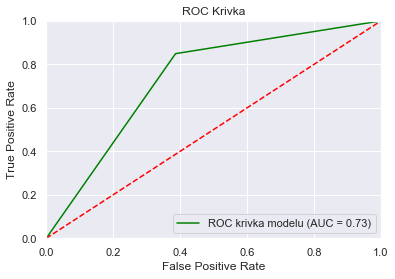

In [39]:
# Testovanie na testovacej množine je v úlohe 12

from sklearn.metrics import roc_curve,auc

# k-NN
fpr, tpr, thresholds = roc_curve(y_test, y_model, pos_label=1) 
roc_auc = auc(fpr, tpr)

plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) 

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

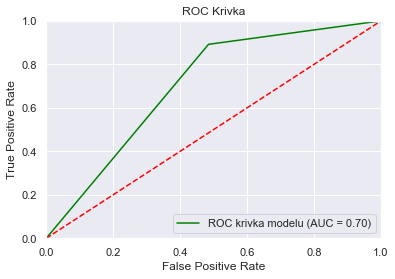

In [40]:
# Decision Tree

fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) 
roc_auc = auc(fpr, tpr)

plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) 

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

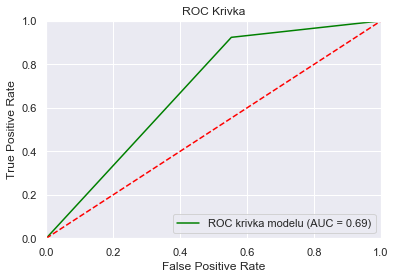

In [41]:
# Random Forest

fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) 
roc_auc = auc(fpr, tpr)

plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) 

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

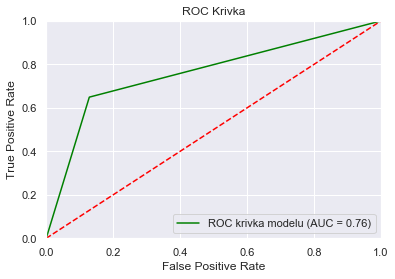

In [42]:
# Naive Bayes

fpr, tpr, thresholds = roc_curve(y_test, y_nb, pos_label=1) 
roc_auc = auc(fpr, tpr)

plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) 

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Po zobrazení ROC kriviek, sa nám javí ako najlepší model Naive Bayes s AUC = 0.76 a druhý najlepší model k-NN s koeficientom 25 a AUC = 0.73.

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [48]:
# k-NN = 25

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_train, y_train)
y_model = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")
print()
print(confusion_matrix(y_test, y_model))

Presnosť (accuracy) modelu: 0.7903454803596782
Presnosť (precision) modelu: 0.8683870967741936
Návratnosť (recall) modelu: 0.849211356466877

[[ 324  204]
 [ 239 1346]]


In [47]:
# Decision Tree

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=2, presort=True)
dtree.fit(X_train, y_train)
y_dtree=dtree.predict(X_test)

print("Accuracy: %0.3f" % accuracy_score(y_test, y_dtree))
print("Precision: %0.3f" % precision_score(y_test, y_dtree))
print("Recall: %0.3f" % recall_score(y_test, y_dtree))
print()
print(confusion_matrix(y_test, y_dtree))

Accuracy: 0.798
Precision: 0.847
Recall: 0.892

[[ 272  256]
 [ 171 1414]]


In [44]:
# Random Forest

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
y_rf = rf.predict(X_test) 

print("Accuracy: %0.3f" % accuracy_score(y_test, y_rf))
print("Precision: %0.3f" % precision_score(y_test, y_rf))
print("Recall: %0.3f" % recall_score(y_test, y_rf))
print("F1: %0.3f" % f1_score(y_test, y_rf))
print()
print(confusion_matrix(y_test, y_rf))

Accuracy: 0.805
Precision: 0.834
Recall: 0.924
F1: 0.877

[[ 236  292]
 [ 120 1465]]


In [45]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb = nb.predict(X_test)

print("Accuracy: %0.3f" % accuracy_score(y_test, y_nb))
print("Precision: %0.3f" % precision_score(y_test, y_nb))
print("Recall: %0.3f" % recall_score(y_test, y_nb))
print()

print(confusion_matrix(y_test, y_nb))

Accuracy: 0.705
Precision: 0.938
Recall: 0.649

[[ 460   68]
 [ 556 1029]]


In [ ]:
# Podľa vypočítaných metrík sa nám javí ako najpresnejší model Random Forest, Decision Tree, k-nn a nakoniec Naive Bayes.

In [38]:
# Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dtree, feature_names=X_normData.columns.values, class_names=['0','1'], out_file=f)

In [ ]:
# Decision Tree si zobralo za rozhodujúci atribút Contract: Month_to_Month.